<a href="https://colab.research.google.com/github/viniciusrpb/deeplearning_images/blob/main/mnist_classification_fastai_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalação do fastai no Google Colab

In [26]:
#!pip3 install -U fastai2
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


### Download do MNIST no repositório do fastai

In [36]:
from fastbook import *
from fastai.vision.all import *

path = untar_data(URLs.MNIST)

print((path).ls())

[Path('testing'), Path('training')]


In [37]:
(path/'training').ls()

path_train = path/"training"
path_test = path/"testing"

training_set = Path(path_train)

### Mostra uma imagem específica do conjunto de treinamento

In [59]:
fns= get_image_files(path_train)

# esse print imprime todas os paths das imagens do training set
#print(fns)

img = Image.open(path/"training/3/46296.png")
img.to_thumb(128,128)

### Carrega as imagens para uma estruturas de dados "DataBlock" PyTorch/Fastai
###### RandomSplitter: sempre gera os mesmos conjuntos de treinamento e teste

In [60]:
train_datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))  #crop the images as squares of 128 x 128
                            # it crops the images to fit a square shape of the size requested
                            # using the full width or height

### Pré-processamento comum em CNN: data augmentation, útil quando o conjunto de treinamento é muito pequeno

In [61]:
#train_datablock = train_datablock.new(
#    batch_tfms=aug_transforms(mult=4, pad_mode='reflection', do_flip=True, 
#                              flip_vert=True,max_rotate=180.0,min_scale=0.5,max_zoom=1.5))

# Obtém a estrutura dataloaders do treinamento, utilizando o batch_size = 32
dls_train_val = train_datablock.dataloaders(training_set,bs=32)

### Apresenta um batch de exemplo

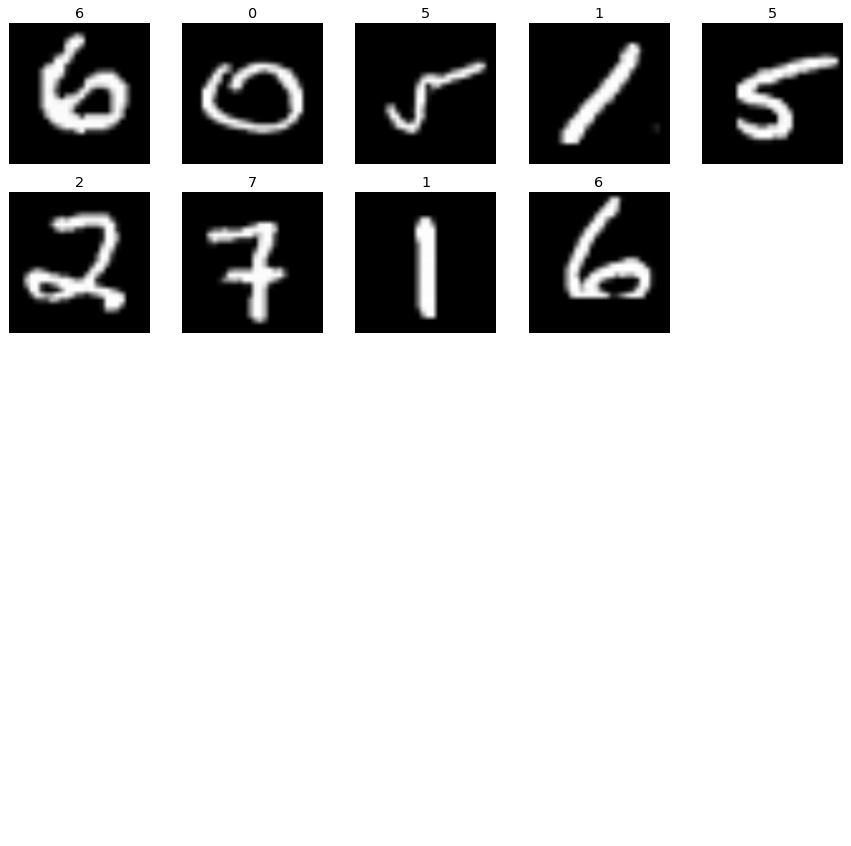

In [52]:
dls_train_val.show_batch(nrows=5, ncols=5)

### Ajuste da medida F1-Score para avaliar a performance do modelo de CNN

In [53]:
f1 = FBeta(average='macro', beta=1)

### Criação do modelo AlexNet

In [54]:
alexnet_learner = cnn_learner(dls_train_val, alexnet, pretrained=False,
                              loss_func = CrossEntropyLossFlat(),
                              metrics=[error_rate,accuracy,f1])

### Treinamento do modelo AlexNet

In [55]:
# executa 5 épocas no treinamento
alexnet_learner.fit(5)

# Se o parâmetro de cnn_learner for pretrained = True, utilizar o comando 

# alexnet_learner.fine_tune(10,lr_base=1e-3)

# parâmetros = número de épocas
# lr_base = valor de learning rate

epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_score,time
0,0.113546,0.339372,0.090667,0.909333,0.898900,01:22
1,0.065258,0.079562,0.021667,0.978333,0.978487,01:23
2,0.058898,0.052027,0.013917,0.986083,0.986126,01:22
3,0.068692,0.083576,0.022250,0.977750,0.977456,01:22
4,0.048467,0.039576,0.011917,0.988083,0.987983,01:23


### Desenha um gráfico sobre a função loss com o passar das épocas

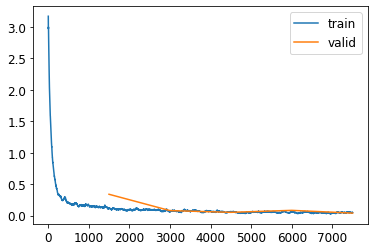

In [56]:
alexnet_learner.recorder.plot_loss()

### Desenha a matriz de confusão do conjunto de validação

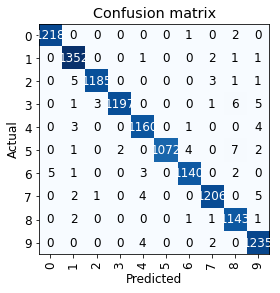

In [47]:
interp = ClassificationInterpretation.from_learner(alexnet_learner)
interp.plot_confusion_matrix()

### Desenha os gráficos das imagens com maior taxa de erro cross entropy


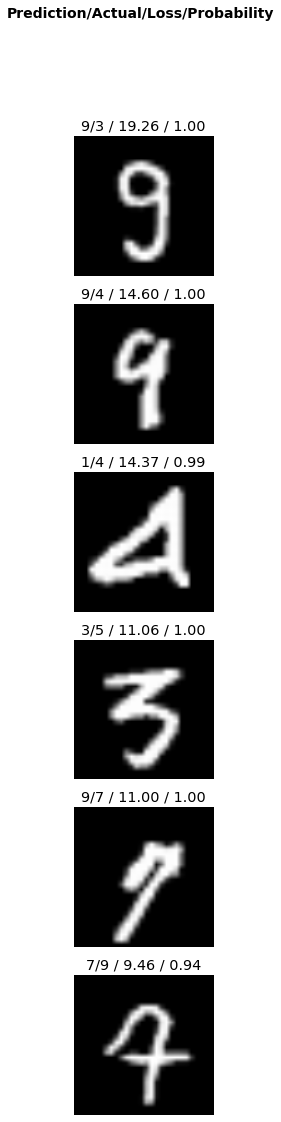

In [48]:
interp.plot_top_losses(6, nrows=6)

### Avaliação de performance utilizando o conjunto de testes

In [57]:
test_set = Path(path_test)

test_files = get_image_files(test_set)

test_dl = alexnet_learner.dls.test_dl(test_files, with_label=True)

In [58]:
pred_probas, _,pred_classes = alexnet_learner.get_preds(dl=test_dl, with_decoded=True)

print(alexnet_learner.dls.vocab)

print(pred_classes)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tensor([3, 3, 3,  ..., 1, 1, 1])
